In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

# Laboratorio 06: Álgebra Lineal.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Santiago silva
*Métodos computacionales 2025-I*

---

# 1.

<center>

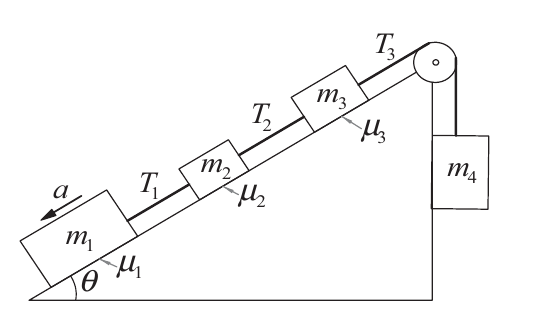

</center>

Cuatro bloques de masas diferentes $m_i$ están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo $\theta$, donde los coeficientes de fricción entre los bloques y el plano son $\mu_i$. Las ecuaciones de movimiento para el sistema son:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta)
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta)
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta)
$$
$$
-T_3 + m_4a = -m_4g
$$

donde:
- $T_i$ representan las tensiones en las cuerdas
- $a$ es la aceleración del sistema
- $\theta = 45^\circ$ es el ángulo de inclinación
- $g = 9.81 m/s^2$ es la aceleración gravitatoria


Determine $a$ y $T_i$

**Datos:**

Masas de los bloques:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coeficientes de fricción:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [4]:
m = np.array([10, 4, 5, 6]) #masas [kg]
mu = np.array([0.25, 0.3, 0.2]) #coeficientes de fricción
theta = np.radians(45)  #ángulo
g = 9.81 #gravedad [m/s^2]

#Matriz de coeficientes
A = np.array([
    [ 1,  0,  0,  m[0]],  #ecuación 1
    [-1,  1,  0,  m[1]], #ecuación 2
    [ 0, -1,  1,  m[2]], #ecuación 3
    [ 0,  0, -1, -m[3]] #ecuación 4
])

#Vector de términos independientes
b = np.array([
    m[0]*g*(np.sin(theta) - mu[0]*np.cos(theta)),
    m[1]*g*(np.sin(theta) - mu[1]*np.cos(theta)),
    m[2]*g*(np.sin(theta) - mu[2]*np.cos(theta)),
    -m[3]*g
])

sol = np.linalg.solve(A, b)
T1, T2, T3, a = sol

print(f"T1 = {T1:.2f} N")
print(f"T2 = {T2:.2f} N")
print(f"T3 = {T3:.2f} N")
print(f"a  = {a:.2f} m/s²")

T1 = 21.00 N
T2 = 28.01 N
T3 = 40.24 N
a  = 3.10 m/s²


# 2.
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

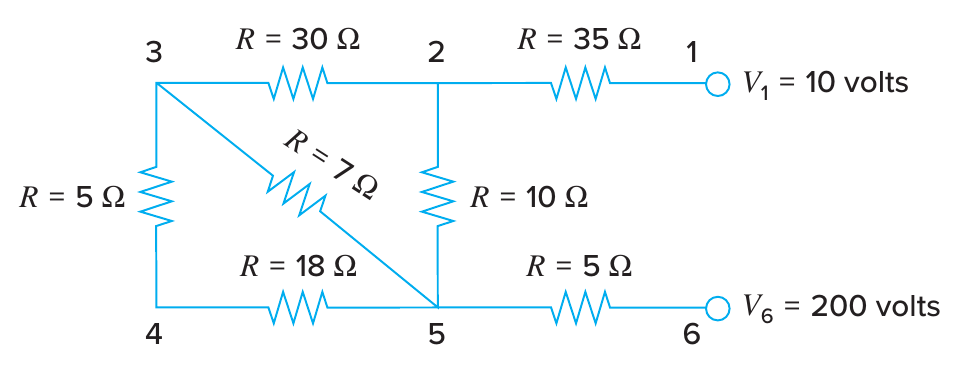


In [7]:
resistencias = {
    (1, 2): 35,
    (2, 3): 30,
    (2, 5): 10,
    (2, 4): 7,
    (3, 4): 5,
    (4, 5): 18,
    (5, 6): 5
}

voltajes = {
    1: 10, #Nodo 1: fuente de 10V
    6: 200 #Nodo 6: fuente de 200V
}

#matriz A (coeficientes) y vector b (términos independientes)
A = np.zeros((4, 4))  #4 incógnitas: V2, V3, V4, V5
b = np.zeros(4)

#(V2 - V1)/35 + (V2 - V3)/30 + (V2 - V4)/7 + (V2 - V5)/10 = 0
A[0] = [1/35 + 1/30 + 1/7 + 1/10, -1/30, -1/7, -1/10]
b[0] = voltajes[1] / 35

#Nodo 3: (V3 - V2)/30 + (V3 - V4)/5 = 0
A[1] = [-1/30, 1/30 + 1/5, -1/5, 0]
b[1] = 0

#Nodo 4: (V4 - V3)/5 + (V4 - V2)/7 + (V4 - V5)/18 = 0
A[2] = [-1/7, -1/5, 1/5 + 1/7 + 1/18, -1/18]
b[2] = 0

#Nodo 5: (V5 - V2)/10 + (V5 - V4)/18 + (V5 - V6)/5 = 0
A[3] = [-1/10, 0, -1/18, 1/10 + 1/18 + 1/5]
b[3] = voltajes[6] / 5

voltajes_desconocidos = la.solve(A, b)

#extraemos voltajes V2 a V5
V2, V3, V4, V5 = voltajes_desconocidos
V1 = voltajes[1]
V6 = voltajes[6]

#corrientes entre pares de nodos
corrientes = {
    'i_12': (V1 - V2) / resistencias[(1, 2)],
    'i_23': (V2 - V3) / resistencias[(2, 3)],
    'i_24': (V2 - V4) / resistencias[(2, 4)],
    'i_25': (V2 - V5) / resistencias[(2, 5)],
    'i_34': (V3 - V4) / resistencias[(3, 4)],
    'i_45': (V4 - V5) / resistencias[(4, 5)],
    'i_56': (V5 - V6) / resistencias[(5, 6)],
}

print("Voltajes en los nodos desconocidos:")
print(f"V2 = {V2:.2f} V")
print(f"V3 = {V3:.2f} V")
print(f"V4 = {V4:.2f} V")
print(f"V5 = {V5:.2f} V\n")


print("Corrientes entre nodos (A):")
for nombre, valor in corrientes.items():
    print(f"{nombre} = {valor:.4f} A")

Voltajes en los nodos desconocidos:
V2 = 151.36 V
V3 = 157.32 V
V4 = 158.32 V
V5 = 179.81 V

Corrientes entre nodos (A):
i_12 = -4.0387 A
i_23 = -0.1990 A
i_24 = -0.9948 A
i_25 = -2.8450 A
i_34 = -0.1990 A
i_45 = -1.1937 A
i_56 = -4.0387 A


# 3.
Se sabe que un sistema físico es gobernado por las ecuaciones,

$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

- Realice la diagonalización de $A$.

- Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

- Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

- Compare el resultado a la solución analítica,

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})),
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

x(0) = 1.0000, x(1) = 64.8258, x(2) = 4225.7453
y(0) = 1.0000, y(1) = -49.8984, y(2) = -4116.5490
z(0) = 2.0000, z(1) = 102.2943, z(2) = 4717.1287


/tmp/ipython-input-516239069.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  r_t[i] = U @ exp_Dt @ U_inv @ r0           # r(t)


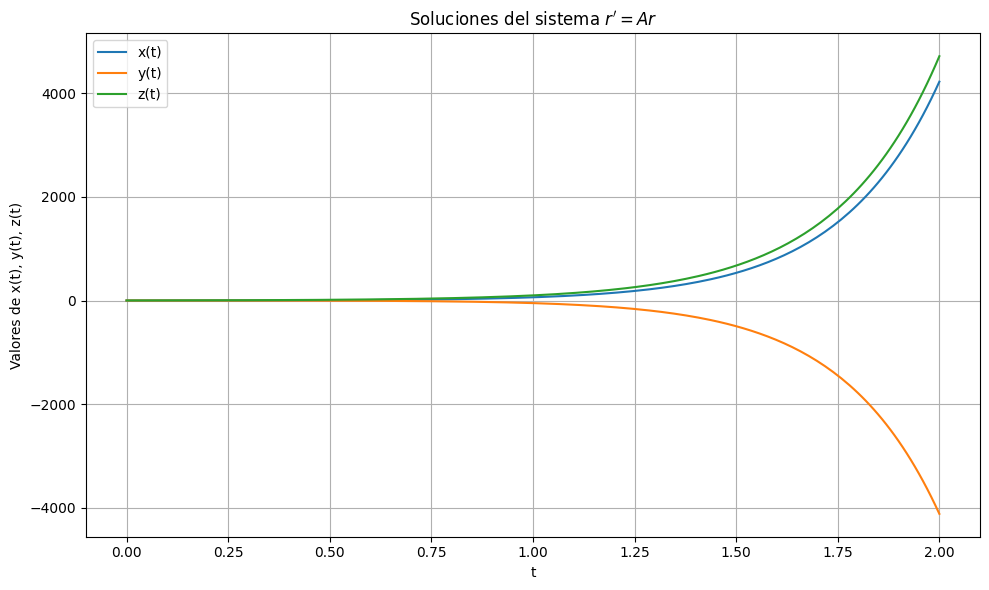

In [10]:
A = np.array([
    [2, -1, 1],
    [0, 3, -1],
    [2, 1, 3]
])

#r(0) = [1, 1, 2]
r0 = np.array([1, 1, 2])

#Diagonalización de A
#A = U D U⁻¹, donde D es diagonal y U tiene los vectores propios
D, U = la.eig(A)
D = np.diag(D)
U_inv = la.inv(U)

#rango de tiempo
t = np.linspace(0, 2, 200)

#inicializamos soluciones
r_t = np.zeros((len(t), 3))  # Cada fila es r(t) = [x(t), y(t), z(t)]

#r(t) = U e^{Dt} U^{-1} r0 para cada t
for i, ti in enumerate(t):
    exp_Dt = np.diag(np.exp(np.diag(D) * ti)) #e^{Dt}
    r_t[i] = U @ exp_Dt @ U_inv @ r0 #r(t)

#extraemos x(t), y(t), z(t)
x, y, z = r_t[:, 0], r_t[:, 1], r_t[:, 2]

print(f"x(0) = {x[0]:.4f}, x(1) = {x[len(t)//2]:.4f}, x(2) = {x[-1]:.4f}")
print(f"y(0) = {y[0]:.4f}, y(1) = {y[len(t)//2]:.4f}, y(2) = {y[-1]:.4f}")
print(f"z(0) = {z[0]:.4f}, z(1) = {z[len(t)//2]:.4f}, z(2) = {z[-1]:.4f}")

#grafica
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t)')
plt.plot(t, z, label='z(t)')
plt.title('Soluciones del sistema $r\' = Ar$')
plt.xlabel('t')
plt.ylabel('Valores de x(t), y(t), z(t)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 4.
Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

$$
\hat{H}|\Psi\rangle = E|\Psi\rangle
$$

donde el Hamiltoniano está dado por $H = -\bm{\mu} \cdot \bm{B} = -\gamma \bm{B} \cdot \bm{S}$, siendo $\gamma$ la razón giromagnética, $\bm{B}$ el campo magnético y $\bm{S}$ el espín. Puede demostrarse que el Hamiltoniano se expresa como:

$$
\hat{H} = -\frac{\gamma\hbar}{2}\begin{pmatrix}
B_z & B_x - iB_y \\
B_x + iB_y & -B_z
\end{pmatrix}
$$

El valor experimental de $\gamma$ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

- Verifique que $H$ es hermítica.
- Encuentre los niveles de energía permitidos.
- Determine los autovectores y verifique su normalización.



In [11]:

gamma = 2 #Factor giromagnético del electrón
hbar = 1.0545718e-34 #Constante de Planck reducida (J·s)
Bz = 1e-4 #Campo magnético en tesla (1 gauss = 1e-4 T)

#Hamiltoniano en forma matricial (solo Bz ≠ 0)
H = -0.5 * gamma * hbar * np.array([
    [ Bz, 0],
    [ 0, -Bz]
])

#Verificar si H es hermítica: H = H†
hermitico = np.allclose(H, H.conj().T)

#Calcular niveles de energía (autovalores)
valores_propios, vectores_propios = np.linalg.eigh(H)

#Verificar normalización de los autovectores
normas = [np.linalg.norm(v)**2 for v in vectores_propios.T]

H, hermitico, valores_propios, vectores_propios, normas

(array([[-1.0545718e-38, -0.0000000e+00],
        [-0.0000000e+00,  1.0545718e-38]]),
 True,
 array([-1.0545718e-38,  1.0545718e-38]),
 array([[1., 0.],
        [0., 1.]]),
 [np.float64(1.0), np.float64(1.0)])

# 5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura.

<center>

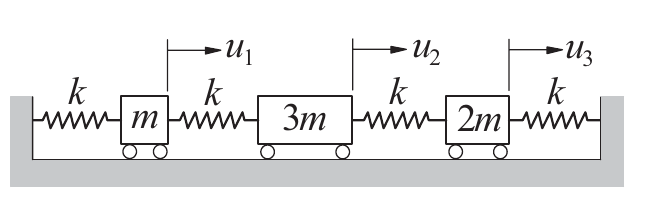
</center>

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

$$
k \left( -2u_1 + u_2 \right) = m\ddot{u}_1
$$

$$
k(u_1 - 2u_2 + u_3) = 3m\ddot{u}_2
$$

$$
k(u_2 - 2u_3) = 2m\ddot{u}_3
$$

donde:
- $u_i(t)$ representa el desplazamiento de la masa $i$ desde su posición de equilibrio.
- $k$ es la constante de los resortes.
- $m$ es la masa.

Determinar las frecuencias de vibración ($\omega$) en términos de $\sqrt{k/m}$ y las formas modales correspondientes.

In [12]:
k = 1 #Se usa como referencia, las frecuencias saldrán en función de sqrt(k/m)
m = 1  #Solo para que M sea proporcional

#Matriz de rigidez (K)
K = k * np.array([
    [ 2, -1,  0],
    [-1,  2, -1],
    [ 0, -1,  2]
])

#Matriz de masa (M)
M = m * np.diag([1, 3, 2])

# K v = ω² M v
eigvals, eigvecs = la.eigh(K, M)

#(ω) en unidades de sqrt(k/m)
omega = np.sqrt(eigvals)

#Normalizamos los vectores modales
modos_norm = eigvecs / np.linalg.norm(eigvecs, axis=0)

omega, modos_norm

(array([0.50281358, 1.08670167, 1.49429737]),
 array([[-0.42955167, -0.38362421, -0.96983375],
        [-0.75050344, -0.31421871,  0.22589817],
        [-0.502225  ,  0.86838877, -0.0916107 ]]))